In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
dataset = pd.read_csv("Loan.csv")

print(dataset.dtypes)

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

In [4]:
dataset_encoded = pd.get_dummies(dataset, columns=['EmploymentStatus'], drop_first=True)

print(dataset_encoded.dtypes)

ApplicationDate                    object
Age                                 int64
AnnualIncome                        int64
CreditScore                         int64
EducationLevel                     object
Experience                          int64
LoanAmount                          int64
LoanDuration                        int64
MaritalStatus                      object
NumberOfDependents                  int64
HomeOwnershipStatus                object
MonthlyDebtPayments                 int64
CreditCardUtilizationRate         float64
NumberOfOpenCreditLines             int64
NumberOfCreditInquiries             int64
DebtToIncomeRatio                 float64
BankruptcyHistory                   int64
LoanPurpose                        object
PreviousLoanDefaults                int64
PaymentHistory                      int64
LengthOfCreditHistory               int64
SavingsAccountBalance               int64
CheckingAccountBalance              int64
TotalAssets                       

In [5]:
label_encoder = LabelEncoder()

dataset_encoded['EducationLevel'] = label_encoder.fit_transform(dataset_encoded['EducationLevel'])

print(dataset_encoded['EducationLevel'].head())

0    4
1    0
2    1
3    3
4    0
Name: EducationLevel, dtype: int32


In [6]:
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['MaritalStatus'], drop_first=True)

print(dataset_encoded.dtypes)

ApplicationDate                    object
Age                                 int64
AnnualIncome                        int64
CreditScore                         int64
EducationLevel                      int32
Experience                          int64
LoanAmount                          int64
LoanDuration                        int64
NumberOfDependents                  int64
HomeOwnershipStatus                object
MonthlyDebtPayments                 int64
CreditCardUtilizationRate         float64
NumberOfOpenCreditLines             int64
NumberOfCreditInquiries             int64
DebtToIncomeRatio                 float64
BankruptcyHistory                   int64
LoanPurpose                        object
PreviousLoanDefaults                int64
PaymentHistory                      int64
LengthOfCreditHistory               int64
SavingsAccountBalance               int64
CheckingAccountBalance              int64
TotalAssets                         int64
TotalLiabilities                  

In [7]:
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['HomeOwnershipStatus'], drop_first=True)

print(dataset_encoded.dtypes)

ApplicationDate                    object
Age                                 int64
AnnualIncome                        int64
CreditScore                         int64
EducationLevel                      int32
Experience                          int64
LoanAmount                          int64
LoanDuration                        int64
NumberOfDependents                  int64
MonthlyDebtPayments                 int64
CreditCardUtilizationRate         float64
NumberOfOpenCreditLines             int64
NumberOfCreditInquiries             int64
DebtToIncomeRatio                 float64
BankruptcyHistory                   int64
LoanPurpose                        object
PreviousLoanDefaults                int64
PaymentHistory                      int64
LengthOfCreditHistory               int64
SavingsAccountBalance               int64
CheckingAccountBalance              int64
TotalAssets                         int64
TotalLiabilities                    int64
MonthlyIncome                     

In [8]:
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['LoanPurpose'], drop_first=True)

print(dataset_encoded.dtypes)

ApplicationDate                    object
Age                                 int64
AnnualIncome                        int64
CreditScore                         int64
EducationLevel                      int32
Experience                          int64
LoanAmount                          int64
LoanDuration                        int64
NumberOfDependents                  int64
MonthlyDebtPayments                 int64
CreditCardUtilizationRate         float64
NumberOfOpenCreditLines             int64
NumberOfCreditInquiries             int64
DebtToIncomeRatio                 float64
BankruptcyHistory                   int64
PreviousLoanDefaults                int64
PaymentHistory                      int64
LengthOfCreditHistory               int64
SavingsAccountBalance               int64
CheckingAccountBalance              int64
TotalAssets                         int64
TotalLiabilities                    int64
MonthlyIncome                     float64
UtilityBillsPaymentHistory        

In [9]:
X = dataset_encoded.drop(columns=['RiskScore', 'ApplicationDate'])
y = dataset_encoded['RiskScore']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_model = DecisionTreeRegressor()

bagging_model = BaggingRegressor(estimator=base_model, n_estimators=50, random_state=42)

bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50,
                 random_state=42)

In [11]:
y_pred = bagging_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.2012777573333333
R² Score: 0.9803751171672301


Valor mínimo: 29.6
Valor máximo: 79.0
Média: 50.532900000000005
Desvio Padrão: 7.824460020928164


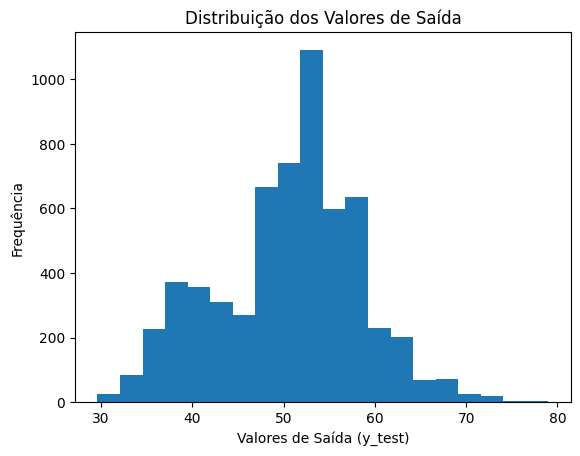

In [12]:
print(f'Valor mínimo: {y_test.min()}')
print(f'Valor máximo: {y_test.max()}')

print(f'Média: {y_test.mean()}')
print(f'Desvio Padrão: {y_test.std()}')

import matplotlib.pyplot as plt

plt.hist(y_test, bins=20)
plt.xlabel('Valores de Saída (y_test)')
plt.ylabel('Frequência')
plt.title('Distribuição dos Valores de Saída')
plt.show()

In [13]:
y_train_pred = bagging_model.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)


print(f'R² Score de Treinamento: {r2_train}')

R² Score de Treinamento: 0.9970870902424216


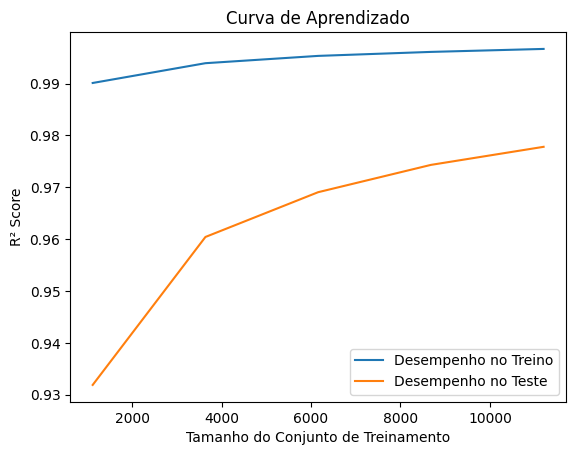

In [14]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(bagging_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


plt.plot(train_sizes, train_scores_mean, label="Desempenho no Treino")
plt.plot(train_sizes, test_scores_mean, label="Desempenho no Teste")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("R² Score")
plt.title("Curva de Aprendizado")
plt.legend()
plt.show()

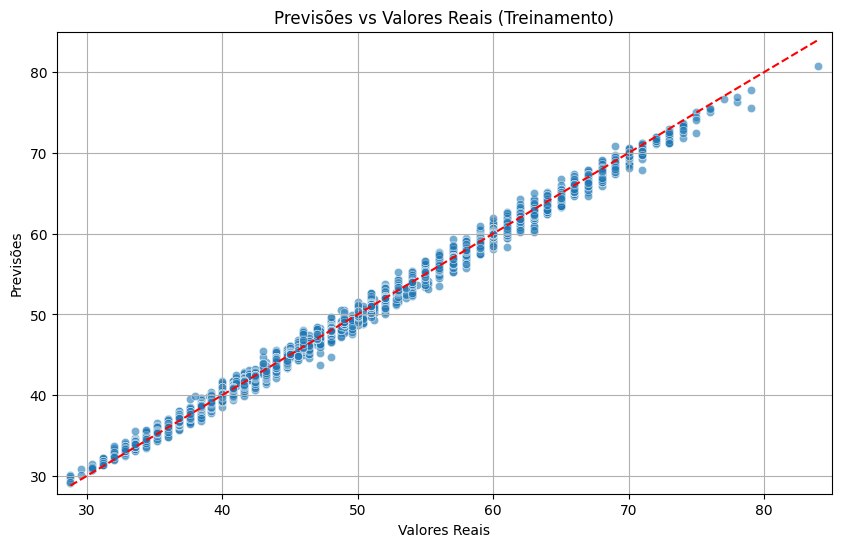

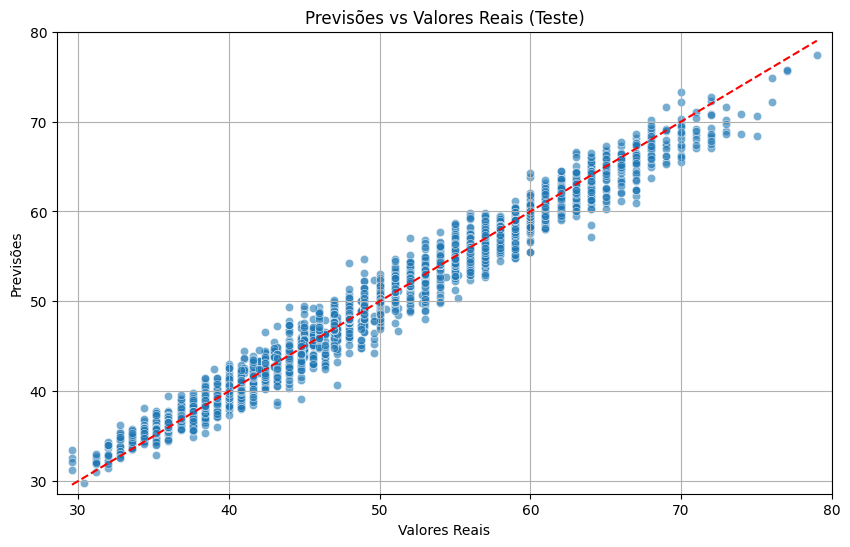

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

y_train_pred = bagging_model.predict(X_train)
y_test_pred = bagging_model.predict(X_test)

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # Linha de referência
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title(title)
    plt.xlim(y_true.min() - 1, y_true.max() + 1)
    plt.ylim(y_true.min() - 1, y_true.max() + 1)
    plt.grid()
    plt.show()

plot_predictions(y_train, y_train_pred, 'Previsões vs Valores Reais (Treinamento)')

plot_predictions(y_test, y_test_pred, 'Previsões vs Valores Reais (Teste)')

In [16]:
import pickle
with open('BaggingRegression.pkl', 'wb') as file:
    pickle.dump(bagging_model, file)